# 1、什么是人工神经网络？
人工神经网络简称ANN（Artificial Neural NetWork）是模仿生物神经网络结构和功能构建的一种计算模型。可以用于处理和学习复杂的的数据模式，尤其使用解决非线性问题。人工神经网络是机器学习中的一个重要模型，尤其是在省都学习领域中得到了广泛的应用。

# 2、如何构建神经网络？

![人工神经网络结构](./img/人工神经网络结构.png)

对输入信息进行加权计算，并输入到下个节点做加和，再通过激活函数输出

![多层人工神经网络结构](./img/多层人工神经网络结构.png)

- 基本结构：
    - 输入层（Input Layer）：即x那一层（如图像、声音、文本），每个输入藤正对应一个神经元，输入层将数据传递到下一层神经元
    - 输出层（Output Layer）：即输出y那一层，输出层的神经元根据网络任务（回归、分类）最终生成预测结果
    - 隐藏层（hidden layer）：输入层和输出层之间都是隐藏层，神经网络的深度“深度”通常是由隐藏层的数量决定。隐藏层的神经元通过加权激活函数处理输入，并将结果传递到下一层。
- 特点：
    - 同一层神经网络之间没有连接
    - 第N层的每个神经网络和第N-1层所有的神经网络相连（Fully Connect的含义），这就是全联接层神经网络（FCNN）
    - 全联接神经网络接收的样本数据是二维，数据在每一层之间需要以二维的形式传递
    - 第N-1层神经元的输出就是第N层神经元的输入
    - 每个连接都有一个权重值（w系数和b系数）


- 内部状态值和激活值（内部状态值=加权求和值和激活值=反向传播时会产生激活值梯度和内部状态值梯度）通过控制每个神经元的内部状态值大小；每一层的内部状态值的方差、每一层的激活值的方差可让整个神经网络工作的更好。
    - 内部状态值
        - 神经元或隐藏单元的内部存储值，它反映了当前神经元接收到输入、理解信息以及网络内部的加权计算结果
        - 每个输入$x_i$都有一个与之想成的权重$w_i$，表示每个输入信号的重要性
        - $z = wx + b $(w：权重矩阵 x：输入值 b：偏置)
    - 激活值
        - 通过激活函数（如：ReLU、Sigmoid、Tanh）对内部状态值进行非线性变化后，得到的结果，激活值决定了当前神经元的输出。
        - $a = f(z)$ (f：激活函数 z：内部状态值)


# 3、什么是网络非线性因素？
- 没有引入非线性因素的网络等价于使用以恶搞线性模型拟合
- 通过给网络输出增加激活函数，实现引入非线性因素，使得网络模型可以逼近任意函数，提升网络对复杂问题的拟合能力

# 3、什么是激活函数？
激活函数用于对于每层的输出数据进行变换，进而为了整个网络注入非线性因素，此时神经网络就可以拟合各种曲线，如果不使用激活函数整个网络虽然看起来复杂，起本质还是相当于一种线性模型

- Sigmoid函数：
    - 公式：$f(x)=\frac{1}{1 + e^{-x}}$
    - 将输入映射到 (0, 1) 之间，呈 S 形曲线，具有非线性特性。



# 4、如何选择激活函数？

![激活函数](./img/激活函数.png)


对于隐藏层:
- 优先选择ReLU激活函数
- 如果ReLu效果不好，那么尝试其他激活，如Leaky ReLu等。
- 如果你使用了ReLU， 需要注意一下Dead ReLU问题，避免出现0梯度从而导致过多的神经元死亡。
- 少使用sigmoid激活函数，可以尝试使用tanh激活函数


对于输出层:
- 二分类问题选择sigmoid激活函数
- 多分类问题选择softmax激活函数
- 回归问题选择identity激活函数

# 5、什么是参数初始化？
定义：在构建网络之后，网络中的参数是需要初始化的。我们需要初始化的参数主要有权重和偏置，偏置一般初始化为0即可，而对权重的初始化则会更加重要。

# 6、参数初始化作用有哪些？
- 防止梯度消失或爆炸：初始权重过大或者过小会导致梯度在反向传播中指数级增大或缩小
- 提到收敛速度：合理的初始化使得网络的激活值分布适中，有助于梯度高效更新
- 保持对称性破除：权重初始化需要打破对称性，否则网络学的的能力会受到限制

# 7、常见的参数初始化方法有哪些？

- 随机初始化：
    - 均匀分布初始化：权重参数舒适化从区间均居随机取数，默认区间（0，1）可以设置为-($1\over\sqrt{d}$$,$$1\over\sqrt{d}$)均匀分布中生成当前神经元的权重，其中d为圣经元的输入数量
    - 正太分布初始化：随机初始化从均值为0，标准差是1的高斯分布中取样，使用一些很小的值对参数w进行初始化
    - 优点：能有效的打破对称性
    - 缺点：随机范围不当可能会导致梯度问题
    - 适用场景：浅层神经网络或低复杂度模型，隐藏层1～3层，总层数不超过5层

- 全0初始化：神经网络中所有权重参数初始化为0
    - 优点：实现简单
    - 缺点：无法打破对称性，所有神经元更新方向相同，无法有效训练
    - 适用场景：几乎不使用，仅用于偏置项的初始化    

- 全1初始化：神经网络中所有权重参数初始化为1
    - 优点：实现简单
    - 缺点：
        - 无法打破对称性，所有神经元是否能正常前向传播和反向传播
        - 会导致激活值在网络中呈指数增长，容易出现梯度爆炸
    - 适用场景：
        - 测试或调试：比如验证神经网络是否能正常的前向传播和反向传播
        - 特殊模型结构：某些系数网络或特定的自定义网络中可能需要手动设置部分参数为1
        - 偏置初始化：偶尔可以讲偏置初始化为小的正值比如：0/1，但是很少用1作为偏置的初始化值
    
- 固定初始化：将神经网络中所有权重参数初始化为某个固定值
    - 优点：实现简单
    - 缺点：
        - 无法打破对称性，所有神经元更新方向相同，无法有效的训练
        - 初始化权重过大或者过小都可能导致梯度爆炸或消失的问题
    - 适用场景：测试或调试


- kaiming初始化：也叫HE初始化，转为ReLU和其变体，考虑到ReLU激活函数特性，对输入维度进行缩放
    - 优点：适合ReLU能保持梯度稳定
    - 缺点：对非ReLU激活函数效果一般
    - 适用场景：深度网络10层以上，使用ReLU、Leaky ReLU激活函数

- xavier初始化：也叫Glorot初始化
    - xavier初始化分为两种：正态分布xavier初始化和均匀分布xavier初始化
        - 正态化的Xavier初始化
            - w权重值从均值为0, 标准差为std中随机采样，$std = sqrt(2 / (fan_in + fan_out))$
            - std值越小，w权重值离均值0分布相对集中，计算得到的内部状态值有较小的正值或负值
        - 均匀分布的Xavier初始化
            - $[-limit，limit]$ 中的均匀分布中抽取样本, limit 是 $sqrt(6 / (fan_in + fan_out))$
        - fan_in 是输入神经元个数，当前层接受的来自上一层的神经元的数量。简单来说，就是当前层接收多少个输入
        - fan_out 是输出神经元个数，当前层输出的神经元的数量，也就是当前
    - 优点：适用于Sigmoid、Tanh等激活函数，解决梯度消失问题
    - 缺点：对ReLU等激活函数表现欠佳
    - 适用场景：网络深度10层以上，使用Sigmoid和Tanh激活函数


# 批量归一正则化(Batch Normalization)

> 在神经网络的训练过程中，流经网络的数据都是一个batch，每个batch之间的数据分布变化非常剧烈，==这就使得网络参数频繁的进行大的调整以适应流经网络的不同分布的数据==，给模型训练带来非常大的不稳定性，使得模型难以收敛。如果我们对每一个batch的数据进行标准化之后，数据分布就变得稳定，参数的梯度变化也变得稳定，有助于加快模型的收敛。通过标准化每一层的输入，使其均值接近0，方差接近1，从而加速训练并提高泛化能力。

![批量归一化](./img/批量归一化.png)


先对数据标准化，再对数据重构（缩放+平移），写成公式如下所示：
![批量归一化公式](./img/批量归一化公式.png)


λ和β是可学习的参数，它相当于对标准化后的值做了一个**线性变换**，**λ为系数，β为偏置；**

eps 通常指为 1e-5，避免分母为 0；

E(x) 表示变量的均值；

Var(x) 表示变量的方差；



**批量归一化的步骤如下：**

1. **计算均值和方差**：对于每个神经元（即每一层的输入特征），计算该特征在一个小批量（batch）上的均值 $$μ_B$$ 和方差 $$\sigma_B^2$$，它们的计算公式如下：

   			$$μ_B=\frac{1}{m} \sum_{i=1}^{m} x_i$$

   			$$σ_B^2=\frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2$$

   其中 $$x_i$$ 表示小批量中的第 $$i$$ 个样本，$$m$$ 是小批量的样本数量。

2. **标准化**：然后，对每个样本的输入进行标准化，得到归一化的输出：

   			$$\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$

   其中，$$ϵ$$ 是一个小常数，用来避免除以零的情况。

3. **缩放和平移**：为了让网络能够恢复其学习能力，BN 层引入了两个可训练的参数 $$γ$$ 和 $$β$$，分别用于**缩放**和**平移**：

   			$$y_i = \gamma \hat{x}_i + β$$

   其中，$$γ$$ 和 $$β$$ 是可学习的参数，通过 γ 和 β，BN 层不再是简单的将每一层输入强行变为标准正态分布，而是允许网络学习更适合于该层的输入分布；规范化操作会丢失原始输入的一些信息，而 $$γ$$ 和 $$β$$ 可以弥补这种信息损失。

   

**批量归一化的作用：**

- **减少内部协方差偏移：**通过对每层的输入进行标准化，减少了输入数据分布的变化，从而加速了训练过程，并使得网络在训练过程中更加稳定。

- **加速训练：**
  - 在没有批量归一化的情况下，神经网络的训练通常会很慢，尤其是深度网络。因为在每层的训练过程中，输入数据的分布（特别是前几层）会不断变化，这会导致网络学习速度缓慢。
  - 批量归一化通过确保每层的输入数据在训练时分布稳定，有效减少了这种变化，从而加速了训练过程。

- **起到正则化作用：**批量归一化可以视作一种正则化方法，因为它引入了对训练样本的噪声（不同批次的统计信息不同，批次较小的均值和方差估计会更加不准确），使得模型不容易依赖特定的输入特征，从而起到一定的正则化效果，减少了对其他正则化技术（如Dropout）的需求。

- **提升泛化能力：**由于其正则化效果，批量归一化能帮助网络在测试集上取得更好的性能。

  

==**批量归一化层在计算机视觉领域使用较多**==

**Batch Normalization 的使用步骤：**

1. **在网络层后添加 BN 层：**
   - 通常，BN 层会添加在卷积层 (Conv2d) 或全连接层 (Linear) 之后，**激活函数之前**。
   - 例如：Conv2d -> BN -> ReLU 或者 Linear -> BN -> ReLU。
2. **训练时：**==model.train()==
   - BN 层会计算当前批次的均值 $$μ$$ 和方差 $$σ²$$。
   - 然后，利用这两个统计量对当前批次的数据进行规范化。
   - 规范化后的数据会被缩放 $$γ$$ 和平移 $$β$$。
   - 同时，BN 层还会维护一个**全局均值**和**全局方差**的移动平均值，用于推理阶段。
3. **推理时：**==model.eval()==
   - 推理时，不会再使用当前批次的均值和方差，而是使用训练阶段计算的**全局均值**和**全局方差**。
   - 同样，规范化后的数据会被缩放 $$γ$$ 和平移 $$β$$。







In [44]:
import torch.nn as nn

def uniform_distribution_init():
    '''
    均匀分布初始化
    :return: 
    '''
    print("均匀分布初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    # 0~1均匀分布
    nn.init.uniform_(linear.weight)
    nn.init.uniform_(linear.bias)
    print(linear.weight.data)
    print("-" * 100)
    
def constant_distribution_init():
    '''
    固定值初始化
    :return: 
    '''
    print("固定值初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    nn.init.constant_(linear.weight, 5)
    print(linear.weight.data)
    print("-" * 100)

def all_zeros_distribution_init():
    '''
    全零初始化
    :return: 
    '''
    print("全零初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    nn.init.zeros_(linear.weight)
    print(linear.weight.data)
    print("-" * 100)


def all_ones_distribution_init():
    '''
    全1初始化
    :return: 
    '''
    print("全1初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    nn.init.ones_(linear.weight)
    print(linear.weight.data)
    print("-" * 100)
    
    
def normal_distribution_init():
    '''
    正态分布初始化
    :return: 
    '''
    print("正态分布初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    nn.init.normal_(linear.weight, mean=0, std=1)
    print(linear.weight.data)
    print("-" * 100)
    
def kaiming_distribution_init():
    '''
    kaiming初始化
    :return: 
    '''
    
    print("kaiming正太分布初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    nn.init.kaiming_normal_(linear.weight, nonlinearity='relu')
    print(linear.weight.data)

    print("kaiming均匀分布初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
    print(linear.weight.data)
    print("-" * 100)

def xavier_distribution_init():
    '''
    xavier初始化
    :return: 
    '''
    
    print("xavier正太分布初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    nn.init.xavier_normal_(linear.weight)
    print(linear.weight.data)

    print("xavier均匀分布初始化:")
    linear = nn.Linear(5, 3)
    print(linear.weight.data)
    nn.init.xavier_uniform_(linear.weight)
    print(linear.weight.data)
    print("-" * 100)

    
uniform_distribution_init()
constant_distribution_init()
all_zeros_distribution_init()
all_ones_distribution_init()
normal_distribution_init()
kaiming_distribution_init()
xavier_distribution_init()

均匀分布初始化:
tensor([[ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356]])
tensor([[0.3556, 0.4452, 0.0193, 0.2616, 0.7713],
        [0.3785, 0.9980, 0.9008, 0.4766, 0.1663],
        [0.8045, 0.6552, 0.1768, 0.8248, 0.8036]])
----------------------------------------------------------------------------------------------------
固定值初始化:
tensor([[-0.0087,  0.0653, -0.3394, -0.3174,  0.2433],
        [-0.1049,  0.2185,  0.0255,  0.1468,  0.0983],
        [ 0.1626,  0.2217, -0.4142,  0.2251, -0.3144]])
tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])
----------------------------------------------------------------------------------------------------
全零初始化:
tensor([[ 0.2627, -0.2590, -0.3976,  0.3255, -0.0663],
        [ 0.2515,  0.1438, -0.3354,  0.0898,  0.1074],
        [-0.2994, -0.2122,  0.1525,  0.0801, -0.1902]])
tensor([[0., 0., 0., 0., 0.],
    

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

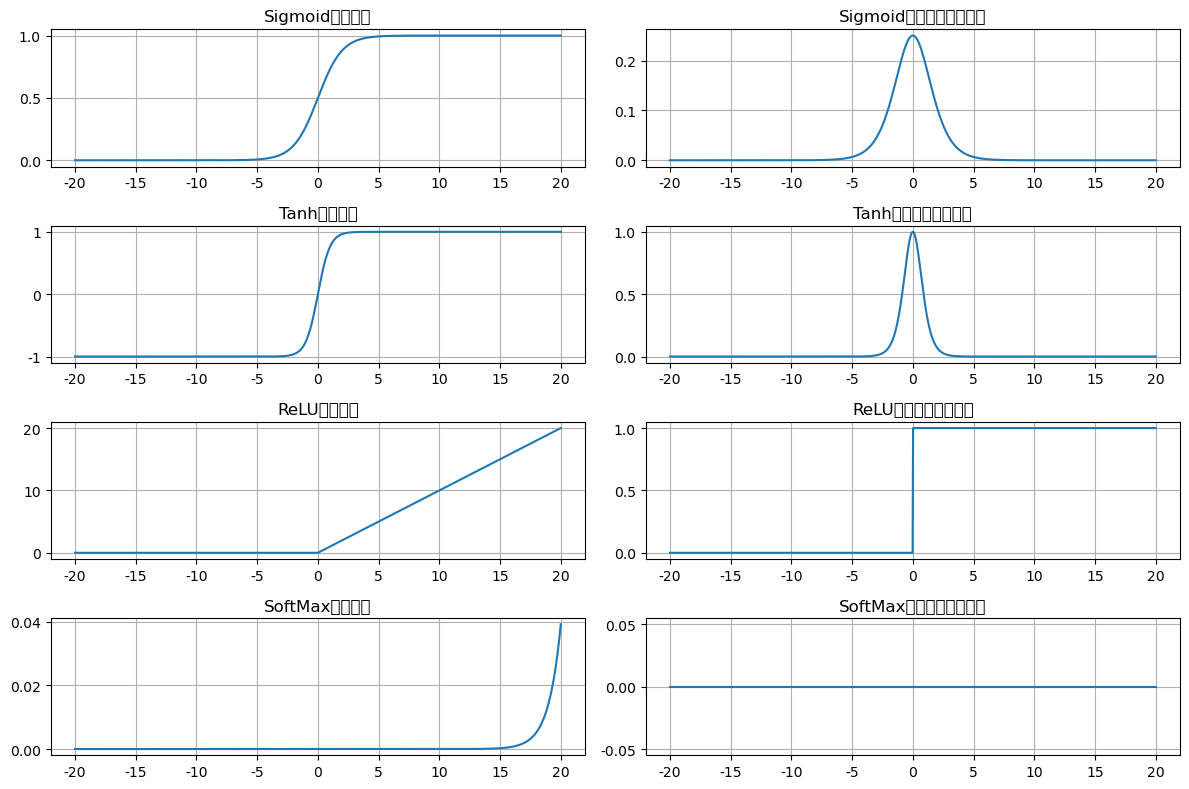

In [65]:
import torch
import matplotlib.pyplot as plt

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示汉字
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

def gen_sub_plot(subplot, title, x, y):
    '''
        绘制子图
    :param subplot: 
    :param title: 
    :param x: 
    :param y: 
    :return: 
    '''
    subplot.plot(x, y)
    subplot.grid()
    subplot.set_title(title)

activation_fun_arr = ['Sigmoid激活函数', 'Tanh激活函数', 'ReLU激活函数', 'SoftMax激活函数']

'''
隐藏层：
    - 优先使用ReLU函数，效果不好可以使用Leaky ReLU激活函数
输出层：
    - 二分类问题优先使用Sigmoid激活函数
    - 多分类问题优先使用Softmax激活函数
    - 回归问题优先使用identity激活函数
'''

# 创建一个绘制窗口
# _ , axes = plt.subplots(len(activation_fun_arr), 2)
fig, axes = plt.subplots(len(activation_fun_arr), 2, figsize=(12, 8))

for index, item in enumerate(activation_fun_arr):
    # 定义x轴数据
    x = torch.linspace(-20, 20, 1000)
    df_x = torch.linspace(-20, 20, 1000, requires_grad=True)

    '''
    在五层之内会出现梯度消失现象，而且该激活函数并不是以0为中心，激活总数偏向正数，导致梯度更新时候对某些特征产生相同方向影响，因此常用于二分类问题
    '''
    if 'Sigmoid激活函数' == item:
        y = torch.sigmoid(x)
        torch.sigmoid(df_x).sum().backward()

    '''
    Tanh函数是以0为中心，并且收敛速度比Sigmoid更快，迭代次数更少，Tanh两侧导数也为0因此也会出现梯度消失问题，因此最好使用在隐藏层，在输出层使用Sigmoid函数
    '''
    if 'Tanh激活函数' == item:
        y = torch.tanh(x)
        torch.tanh(df_x).sum().backward()

    '''
    ReLu函数可以减少计算过程，ReLu不会出现梯度消失的问题因为当输入值>0梯度为1，ReLU会使一部分神经元输出是0，这样能造成网络稀疏性，并减少参数之间相互依赖关系，缓解了过拟合问题
    '''
    if 'ReLU激活函数' == item:
        y = torch.relu(x)
        torch.relu(df_x).sum().backward()

    '''
    
    '''
    if 'SoftMax激活函数' == item:
        '''
        softmax用于多分类过程中，它是二分类函数sigmoid在多分类上的推广，目的是将多分类的结果以概率的形式展现出来。
        '''
        y = torch.softmax(x, dim=0)
        torch.softmax(df_x, dim=0).sum().backward()  # 计算梯度

    gen_sub_plot(axes[index, 0], item, x.numpy(), y.numpy())
    # 绘制导数图像
    if df_x.grad is not None:
        gen_sub_plot(axes[index, 1], item + '（导数）', df_x.detach().numpy(), df_x.grad.numpy())
    else:
        print(f"Warning: Gradient for {item} is None")

    # 清空梯度，避免累积
    if df_x.grad is not None:
        df_x.grad.zero_()

plt.tight_layout()
# 展示图像
plt.show()

In [4]:
# 构造神经网络模型

import torch
import torch.nn as nn
# !pip install torchsummary
from torchsummary import summary
# 查询当前环境python包安装位置：!python -m site

class Model(nn.Module):
    def __init__(self):
        # 调用父类的初始化属性值，确保nn.Module的初始化代码能够正确执行
        super(Model, self).__init__()
        
        # 创建一个隐藏层模型，3个输入3个输出，并初始化权重
        self.linear1 = nn.Linear(3, 3)
        nn.init.xavier_normal_(self.linear1.weight)
        nn.init.zeros_(self.linear1.bias)
        
        # 创建第二个隐藏层,3个输入2个输出，并初始化权重
        self.linear2 = nn.Linear(3, 2)
        nn.init.kaiming_normal_(self.linear2.weight, nonlinearity='relu')
        nn.init.zeros_(self.linear2.bias)

        # 创建输出层模型
        self.out = nn.Linear(2, 2)
    
    def forward(self, x):
        # 经过第一个线性层 
        x = self.linear1(x)
        # 使用sigmoid激活函数
        x = torch.sigmoid(x)
        
        # 经过第二个线性层
        x = self.linear2(x)
        # 使用relu激活函数
        x = torch.relu(x)
        
        # 数据经过输出层
        x = self.out(x)
        # 使用softmax激活函数
        # dim = -1:每一纬度行数据相加=1
        x = torch.softmax(x, dim=1)
        
        return x

In [5]:
# 创建构造模型函数
def train():
    # 实例化model对象
    my_model = Model()

    # 随机产生数据
    my_data = torch.randn(5, 3)
    print("my_data-->", my_data)
    print("my_data shape", my_data.shape)

    # 数据经过神经网络模型训练
    output = my_model(my_data)
    print("output-->", output)
    print("output shape-->", output.shape)

    # 计算模型参数
    # 计算每层每个神经元的w和b个数总和
    print("======计算模型参数======")
    summary(my_model, input_size=(3,), batch_size=5)

    # 查看模型参数
    print("======查看模型参数w和b======")
    for name, parameter in my_model.named_parameters():
        print(name, parameter)

train()

my_data--> tensor([[ 0.7582,  0.0403,  0.1651],
        [-0.6762,  0.4857,  0.7774],
        [ 0.8624,  0.2105,  0.3891],
        [-1.2230, -0.2849, -0.4277],
        [ 1.7106, -0.5575,  0.3738]])
my_data shape torch.Size([5, 3])
output--> tensor([[0.6444, 0.3556],
        [0.6531, 0.3469],
        [0.6391, 0.3609],
        [0.6531, 0.3469],
        [0.6075, 0.3925]], grad_fn=<SoftmaxBackward0>)
output shape--> torch.Size([5, 2])
======计算模型参数======
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                     [5, 3]              12
            Linear-2                     [5, 2]               8
            Linear-3                     [5, 2]               6
Total params: 26
Trainable params: 26
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total 

In [9]:
import torch
import torch.nn as nn

def test_cross_entropy_loss():
    y_true = torch.tensor([1, 2], dtype=torch.int64)
    y_pred = torch.tensor([[0.2, 0.6, 0.2], [0.1, 0.8, 0.1]], requires_grad=True, dtype=torch.float32)
    print(y_true)
    print(y_pred)

    loss = nn.CrossEntropyLoss()
    # 计算损失结果
    my_loss = loss(y_pred, y_true).detach().numpy()
    print('loss:', my_loss)
test_cross_entropy_loss()

tensor([1, 2])
tensor([[0.2000, 0.6000, 0.2000],
        [0.1000, 0.8000, 0.1000]], requires_grad=True)
loss: 1.1200755


In [12]:
import torch
from torch import nn

def test_BCELoss():
    y_true = torch.tensor([0, 1, 0], dtype=torch.float32)
    y_pred = torch.tensor([0.6901, 0.5459, 0.2469], requires_grad=True)
    print(y_true)
    print(y_pred)
    
    # 实例化二分类交叉熵损失，并计算损失
    loss = nn.BCELoss()
    my_loss = loss(y_pred, y_true).detach().numpy()
    print('loss：', my_loss)

test_BCELoss()

tensor([0., 1., 0.])
tensor([0.6901, 0.5459, 0.2469], requires_grad=True)
loss： 0.6867941


In [20]:
import torch
from torch import nn

# 计算inputs与target之差的绝对值
def test_mean_absolute_loss():
    y_pred = torch.tensor([1.0, 1.0, 1.9], requires_grad=True)
    y_true = torch.tensor([2.0, 2.0, 2.0], dtype=torch.float32)
    print(y_true)
    print(y_pred)

    # 实例MAE损失对象,计算损失
    loss = nn.L1Loss()
    my_loss = loss(y_pred, y_true).detach().numpy()
    print('loss:', my_loss)

test_mean_absolute_loss()

tensor([2., 2., 2.])
tensor([1.0000, 1.0000, 1.9000], requires_grad=True)
loss: 0.7


In [19]:
import torch
from torch import nn

# 计算inputs与target之差的绝对值
def test_mean_squared_loss():
    y_pred = torch.tensor([1.0, 1.0, 1.9], requires_grad=True)
    y_true = torch.tensor([2.0, 2.0, 2.0], dtype=torch.float32)
    print(y_true)
    print(y_pred)

    # 实例MSE损失对象,计算损失
    loss = nn.MSELoss()
    my_loss = loss(y_pred, y_true).detach().numpy()
    print('loss:', my_loss)

test_mean_squared_loss()

tensor([2., 2., 2.])
tensor([1.0000, 1.0000, 1.9000], requires_grad=True)
loss: 0.67


In [21]:
import torch
from torch import nn


def test_smooth_mean_absolute_loss():
    # 1 设置真实值和预测值
    y_true = torch.tensor([0, 3])
    y_pred = torch.tensor([0.6, 0.4], requires_grad=True)
    # 2 实例smmothL1损失对象
    loss = nn.SmoothL1Loss()
    # 3 计算损失
    my_loss = loss(y_pred, y_true).detach().numpy()
    print('loss:', my_loss)

test_smooth_mean_absolute_loss()

loss: 1.14


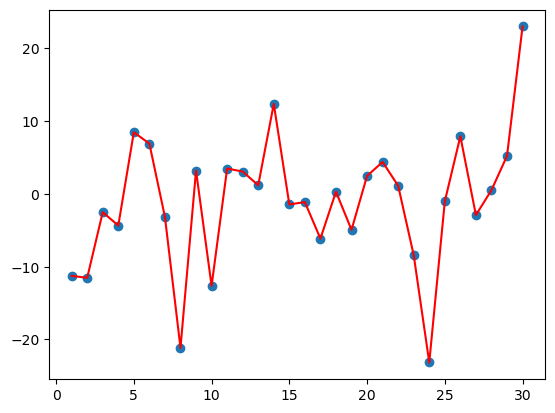

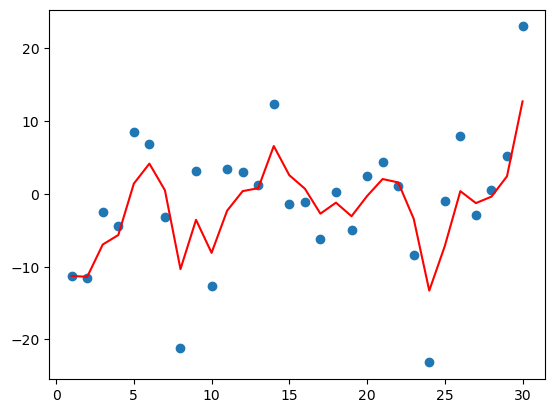

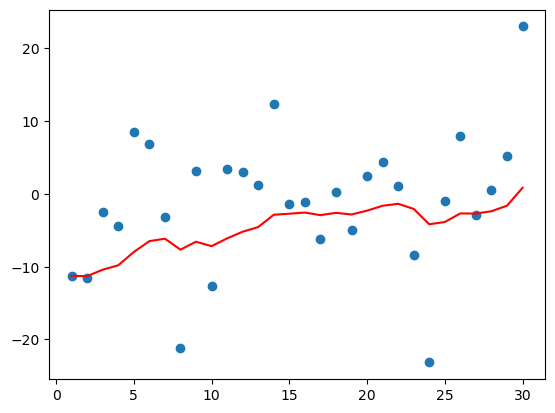

In [40]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

ELEMENT_NUMBER = 30

def actual_average_temperature():
    # 固定随机数种子
    torch.manual_seed(0)
    # 产生三十天随机温度（randn服从正态分布）
    temperature = torch.randn(size=[ELEMENT_NUMBER, ]) * 10
    # print(temperature)

    # 绘制平均温度
    days = torch.arange(1, ELEMENT_NUMBER + 1, 1)
    # print(days)

    plt.plot(days, temperature, color='r')
    plt.scatter(days, temperature)
    plt.show()
    
def exponential_wighted_average_temperature(beta=0.9):
    
    # 固定随机数种子
    torch.manual_seed(0)
    # 产生30天温度
    temperature = torch.randn(size=[ELEMENT_NUMBER, ]) * 10
    # print(temperature)
    
    exp_weight_avg = []
    for index, temp in enumerate(temperature, 1):
        if index.__eq__(1):
            exp_weight_avg.append(temp)
            continue
        # 第二个元素的 EWA 值等于上一个 EWA 乘以 β + 当前气温乘以 (1-β)
        new_temp = exp_weight_avg[index - 2] * beta + (1 - beta) * temp
        exp_weight_avg.append(new_temp)

    # print(exp_weight_avg)
    days = torch.arange(1, ELEMENT_NUMBER + 1, 1)
    # print(days)
    
    plt.plot(days, exp_weight_avg, color='r')
    plt.scatter(days, temperature)
    plt.show()
    
actual_average_temperature()
exponential_wighted_average_temperature(0.5)
exponential_wighted_average_temperature(0.9)

In [53]:
import torch
import torch.nn as nn

def mmonmentum_wighted_average_temperature():

    # 1 初始化权重参数
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
    loss = ((w ** 2) / 2.0).sum()

    # SGD优化方法，学习率0.1 动量0.9
    optimizer = torch.optim.SGD([w], lr=0.01, momentum=0.9)
    # 梯度清零
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第1次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))

    loss = ((w ** 2) / 2.0).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第2次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))

mmonmentum_wighted_average_temperature()    

第1次: 梯度w.grad: 1.000000, 更新后的权重:0.990000
第2次: 梯度w.grad: 0.990000, 更新后的权重:0.971100


In [49]:
def test01():
    # 1 初始化权重参数
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
    loss = ((w ** 2) / 2.0).sum()
    # 2 实例化优化方法：SGD 指定参数beta=0.9
    optimizer = torch.optim.SGD([w], lr=0.01, momentum=0.9)
    # 3 第1次更新 计算梯度，并对参数进行更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第1次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))
    # 4 第2次更新 计算梯度，并对参数进行更新
    # 使用更新后的参数机选输出结果
    loss = ((w ** 2) / 2.0).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第2次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))

test01()

第1次: 梯度w.grad: 1.000000, 更新后的权重:0.990000
第2次: 梯度w.grad: 0.990000, 更新后的权重:0.971100


In [1]:
import torch
import torch.nn as nn

def ada_gradient_optimize():
    # 初始化权重参数
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
    loss = ((w ** 2) / 2.0).sum()

    optimizer = torch.optim.Adagrad([w], lr=0.01)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第1次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))
    
    loss = ((w ** 2) / 2.0).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第2次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))
    
ada_gradient_optimize()    

/Users/BrownSugar/miniconda3/envs/AI-Lesson/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


第1次: 梯度w.grad: 1.000000, 更新后的权重:0.990000
第2次: 梯度w.grad: 0.990000, 更新后的权重:0.982965


In [27]:
import torch
import torch.nn as nn

def RMS_prop_optimize():
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
    loss = ((w ** 2) / 2.0).sum()
    
    # 使用实例化方法：RMSprop算法，其中alpha对应bate
    optimizer = torch.optim.RMSprop([w], lr=0.01, alpha=0.9)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第1次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))
    
    loss = ((w ** 2) / 2.0).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第2次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))

RMS_prop_optimize()    

第1次: 梯度w.grad: 1.000000, 更新后的权重:0.968377
第2次: 梯度w.grad: 0.968377, 更新后的权重:0.945788


C:\Users\bs\AppData\Local\Temp\ipykernel_24288\4098581627.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('第1次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))
C:\Users\bs\AppData\Local\Temp\ipykernel_24288\4098581627.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('第2次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))


In [31]:

def adam_optimize():
    w = torch.tensor([1.0], requires_grad=True)
    loss = ((w ** 2) / 2.0).sum()

    optimizer = torch.optim.Adam([w], lr=0.01, betas=[0.9, 0.99])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第1次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))
    # 4 第2次更新 计算梯度，并对参数进行更新
    # 使用更新后的参数机选输出结果
    loss = ((w ** 2) / 2.0).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('第2次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))

adam_optimize()    

第1次: 梯度w.grad: 1.000000, 更新后的权重:0.990000
第2次: 梯度w.grad: 0.990000, 更新后的权重:0.980003


C:\Users\bs\AppData\Local\Temp\ipykernel_24288\2543283324.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('第1次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))
C:\Users\bs\AppData\Local\Temp\ipykernel_24288\2543283324.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('第2次: 梯度w.grad: %f, 更新后的权重:%f' % (w.grad.numpy(), w.detach().numpy()))


In [67]:
import matplotlib.font_manager as font_manager

# 添加自定义字体路径
font_path = './font/simhei.ttf'  # 将此路径替换为你自己的 SimHei 字体文件的实际路径，也就是刚刚第二步得到的那个路径
font_manager.fontManager.addfont(font_path)

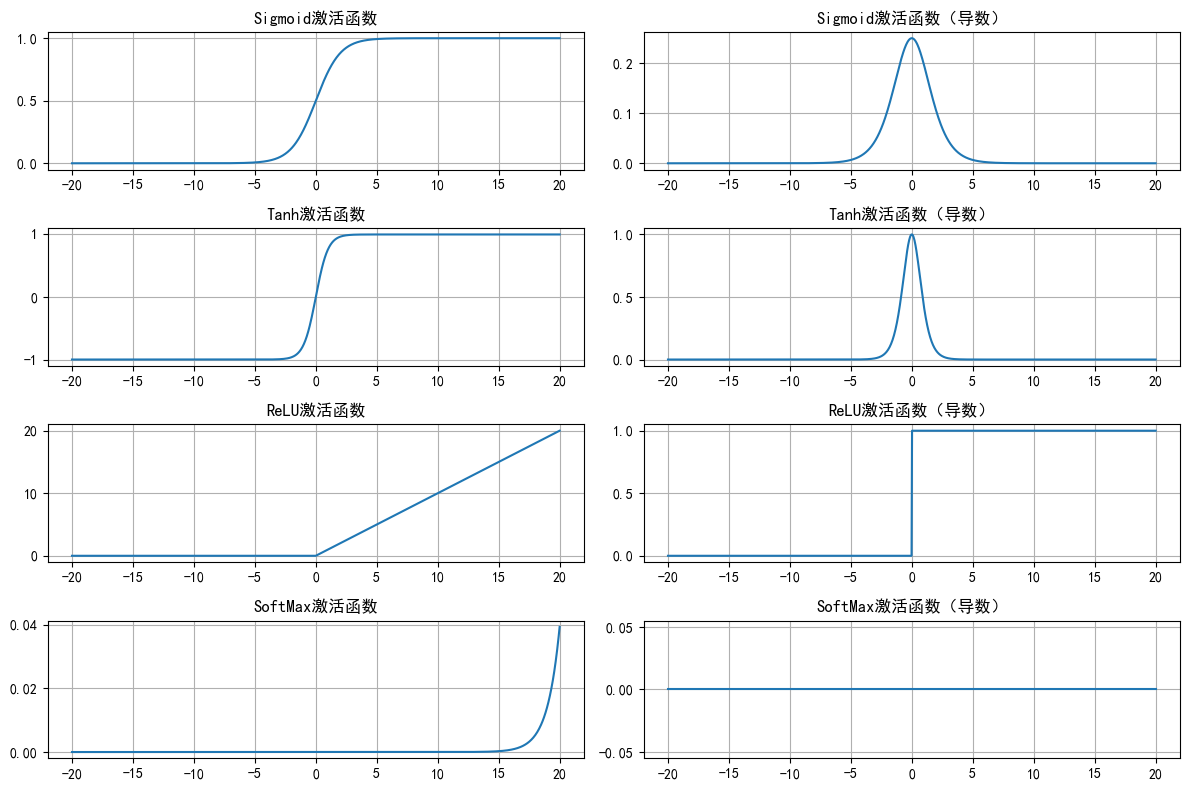

In [69]:
import torch
import matplotlib.pyplot as plt

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示汉字
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

def gen_sub_plot(subplot, title, x, y):
    '''
        绘制子图
    :param subplot: 
    :param title: 
    :param x: 
    :param y: 
    :return: 
    '''
    subplot.plot(x, y)
    subplot.grid()
    subplot.set_title(title)

activation_fun_arr = ['Sigmoid激活函数', 'Tanh激活函数', 'ReLU激活函数', 'SoftMax激活函数']

'''
隐藏层：
    - 优先使用ReLU函数，效果不好可以使用Leaky ReLU激活函数
输出层：
    - 二分类问题优先使用Sigmoid激活函数
    - 多分类问题优先使用Softmax激活函数
    - 回归问题优先使用identity激活函数
'''

# 创建一个绘制窗口
# _ , axes = plt.subplots(len(activation_fun_arr), 2)
fig, axes = plt.subplots(len(activation_fun_arr), 2, figsize=(12, 8))

for index, item in enumerate(activation_fun_arr):
    # 定义x轴数据
    x = torch.linspace(-20, 20, 1000)
    df_x = torch.linspace(-20, 20, 1000, requires_grad=True)

    '''
    在五层之内会出现梯度消失现象，而且该激活函数并不是以0为中心，激活总数偏向正数，导致梯度更新时候对某些特征产生相同方向影响，因此常用于二分类问题
    '''
    if 'Sigmoid激活函数' == item:
        y = torch.sigmoid(x)
        torch.sigmoid(df_x).sum().backward()

    '''
    Tanh函数是以0为中心，并且收敛速度比Sigmoid更快，迭代次数更少，Tanh两侧导数也为0因此也会出现梯度消失问题，因此最好使用在隐藏层，在输出层使用Sigmoid函数
    '''
    if 'Tanh激活函数' == item:
        y = torch.tanh(x)
        torch.tanh(df_x).sum().backward()

    '''
    ReLu函数可以减少计算过程，ReLu不会出现梯度消失的问题因为当输入值>0梯度为1，ReLU会使一部分神经元输出是0，这样能造成网络稀疏性，并减少参数之间相互依赖关系，缓解了过拟合问题
    '''
    if 'ReLU激活函数' == item:
        y = torch.relu(x)
        torch.relu(df_x).sum().backward()

    '''
    
    '''
    if 'SoftMax激活函数' == item:
        '''
        softmax用于多分类过程中，它是二分类函数sigmoid在多分类上的推广，目的是将多分类的结果以概率的形式展现出来。
        '''
        y = torch.softmax(x, dim=0)
        torch.softmax(df_x, dim=0).sum().backward()  # 计算梯度

    gen_sub_plot(axes[index, 0], item, x.numpy(), y.numpy())
    # 绘制导数图像
    if df_x.grad is not None:
        gen_sub_plot(axes[index, 1], item + '（导数）', df_x.detach().numpy(), df_x.grad.numpy())
    else:
        print(f"Warning: Gradient for {item} is None")

    # 清空梯度，避免累积
    if df_x.grad is not None:
        df_x.grad.zero_()

plt.tight_layout()
# 展示图像
plt.show()

/Users/BrownSugar/miniconda3/envs/AI-Lesson/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


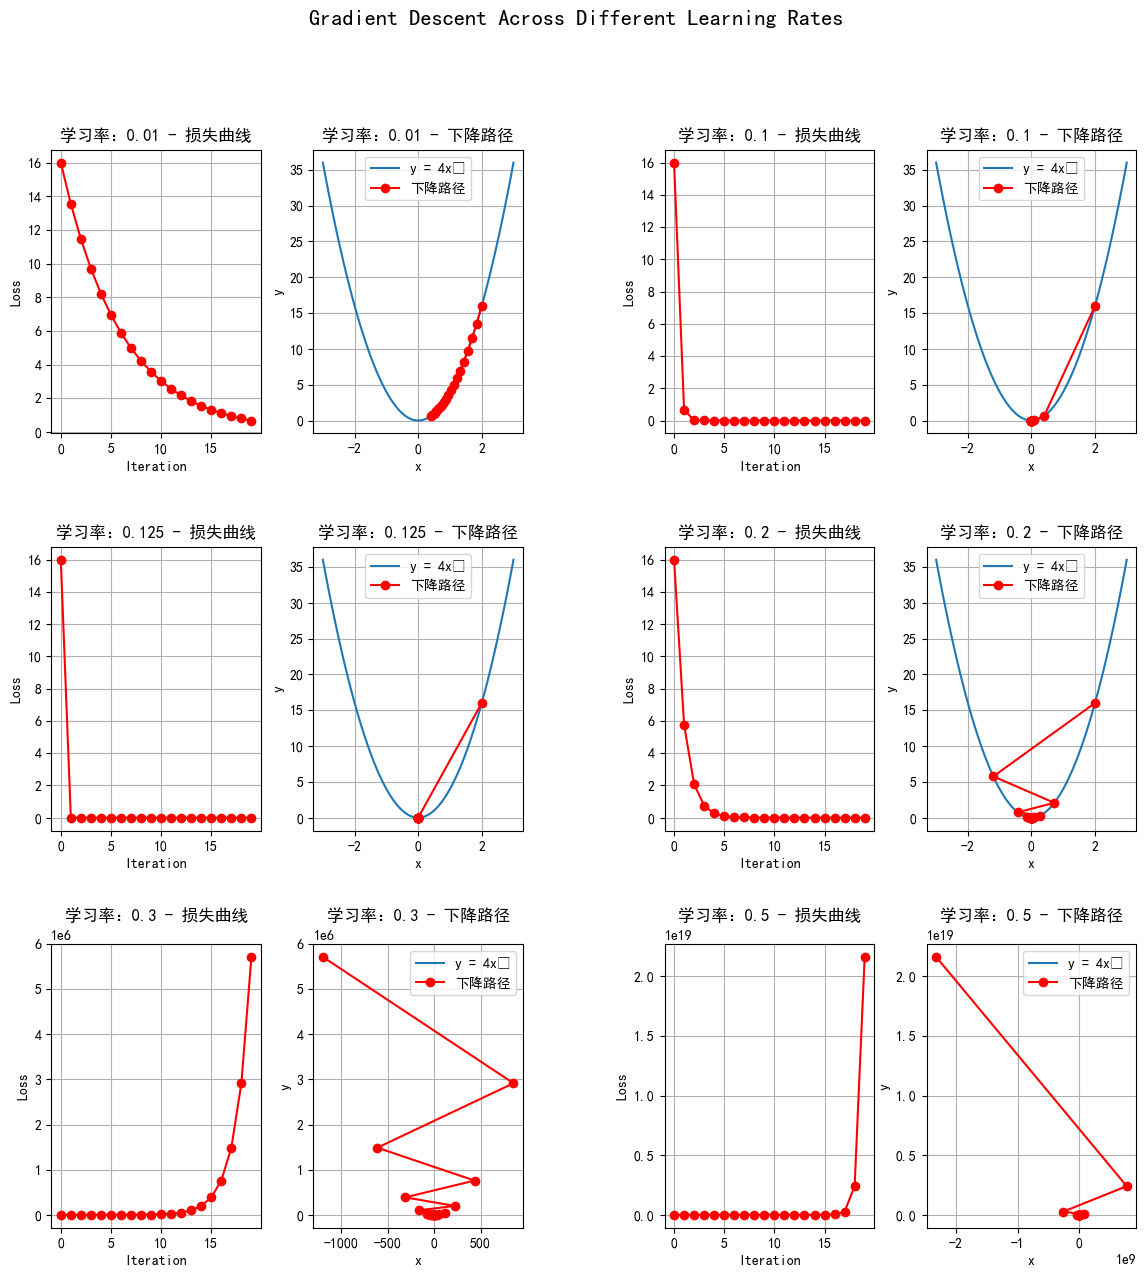

In [68]:
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def construct_fun(x):
    return 4 * x**2

def draw_gradient():
    max_iteration = 20
    lr_arr = [0.01, 0.1, 0.125, 0.2, 0.3, 0.5]  # 新学习率列表

    fig = plt.figure(figsize=(14, 14))
    outer_grid = gridspec.GridSpec(3, 2, wspace=0.3, hspace=0.4)  # 调整为 3x2 布局

    for idx, lr in enumerate(lr_arr):
        x = torch.tensor([2.], requires_grad=True)
        iter_rec, loss_rec, x_rec = [], [], []

        for i in range(max_iteration):
            y = construct_fun(x)
            y.backward()
            x_rec.append(x.item())
            iter_rec.append(i)
            loss_rec.append(y.item())
            x.data.sub_(lr * x.grad)
            x.grad.zero_()

        inner_grid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_grid[idx], wspace=0.25)

        # 左图：损失函数下降曲线
        ax1 = fig.add_subplot(inner_grid[0])
        ax1.plot(iter_rec, loss_rec, '-ro')
        ax1.set_title(f"学习率：{lr} - 损失曲线")
        ax1.set_xlabel("Iteration")
        ax1.set_ylabel("Loss")
        ax1.grid()

        # 右图：下降轨迹图
        ax2 = fig.add_subplot(inner_grid[1])
        x_t = torch.linspace(-3, 3, 100)
        y_t = construct_fun(x_t)
        ax2.plot(x_t.numpy(), y_t.numpy(), label="y = 4x²")
        y_rec = [construct_fun(torch.tensor(i)).item() for i in x_rec]
        ax2.plot(x_rec, y_rec, '-ro', label="下降路径")
        ax2.set_title(f"学习率：{lr} - 下降路径")
        ax2.set_xlabel("x")
        ax2.set_ylabel("y")
        ax2.legend()
        ax2.grid()

    plt.suptitle("Gradient Descent Across Different Learning Rates", fontsize=16)
    plt.show()

draw_gradient()


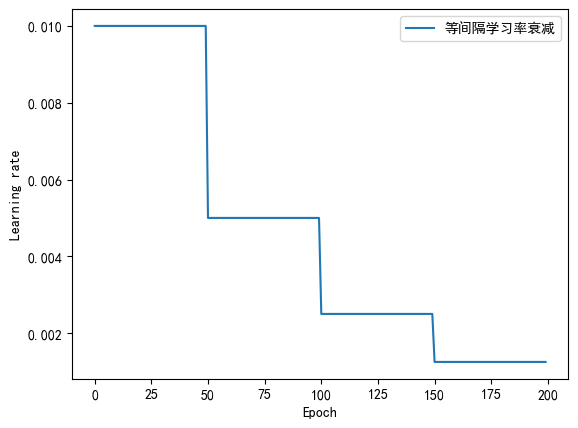

In [35]:
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt

def step_LR():
    '''
    等间隔学习率
    :return: 
    '''
    # 参数初始
    LR= 0.01
    iteration = 10
    max_epoch = 200
    
    # 参数初始化
    y_true = torch.tensor([0])
    x = torch.tensor([1.0])
    w = torch.tensor([1.0], requires_grad=True)
    
    # 优化器
    optimizer = optim.SGD([w], lr=LR, momentum=0.9)
    
    '''
    设置学习下降策略（等间隔学习率衰减方式）
    参数说明：
    step_size:调整间隔数
    gama：调整系数
    调整方式： lr = lr * gama
    '''
    scheduler_lr = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)
    
    # 获取学习率的值和当前epoch
    lr_list, epoch_list = [], []
    for epoch in range(max_epoch):
        # 获取当前学习率 
        lr_list.append(scheduler_lr.get_last_lr())
        # 获取当前epoch
        epoch_list.append(epoch)
        for i in range(iteration):
            # 获取损失值
            loss = (w*x - y_true)** 2
            # 梯度归零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            optimizer.step()
            
         # 更新下一个epoch学习
        scheduler_lr.step()

    # 5.绘制学习率变化的曲线
    plt.plot(epoch_list, lr_list, label="等间隔学习率衰减")
    plt.xlabel("Epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()

step_LR()    

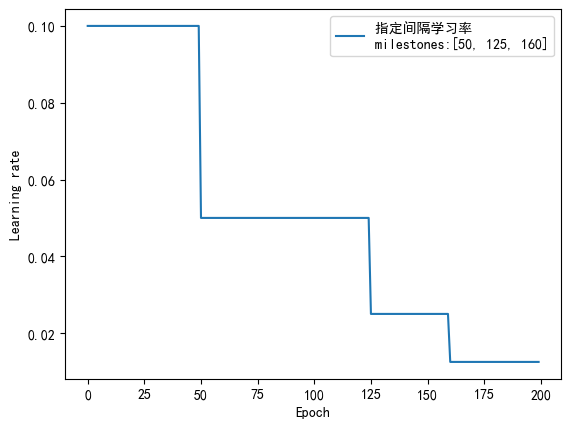

In [36]:
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt

# 指定字体路径
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

def specified_interval_learn_rate():
    '''
    指定间隔学习率
    :return: 
    '''
    # 固定随机数种子
    torch.manual_seed(1)
    # 设置学习率、迭代次数、皮批次数量
    LR, iteration, max_epoch = 0.1, 10, 200
    
    # 设置目标值/真实值
    y_true = torch.tensor([0])
    # 设置输入
    x = torch.tensor([1.0])
    # 设置权重参数
    w = torch.tensor([1.0], requires_grad=True)
    # 设置优化器,使用随机梯度下降SGD
    optimizer = optim.SGD([w], lr=LR, momentum=0.9)
    
    # 设置调整时刻数
    milestones = [50, 125, 160]
    # 设置学习率下降策略
    '''
    参数说明：
    milestones：设置调整轮次
    gamma：设置调整系数
    调整方式：lr = lr * gamma
    '''
    scheduler_lr = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.5)
    # 定义学习率和批次集合
    lr_arr, epoch_arr = [], []
    for epoch in range(max_epoch):
        # 将当前学习率和批次数据保存进集合
        # print(lr_arr)
        # print('scheduler_lr:', scheduler_lr)
        # print('get_last_lr:', scheduler_lr.get_last_lr())
        lr_arr.append(scheduler_lr.get_last_lr())
        epoch_arr.append(epoch)
        for i in range(iteration):
            loss = (w * x - y_true) ** 2
            # 防止梯度累加，梯度清零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 更新参数
            optimizer.step()
        # 更新下一个epoch学习率
        scheduler_lr.step()
    
    plt.plot(epoch_arr, lr_arr, label="指定间隔学习率 \nmilestones:{}".format(milestones))
    plt.xlabel('Epoch')
    plt.ylabel('Learning rate')
    plt.legend()
    plt.show()
 
specified_interval_learn_rate()

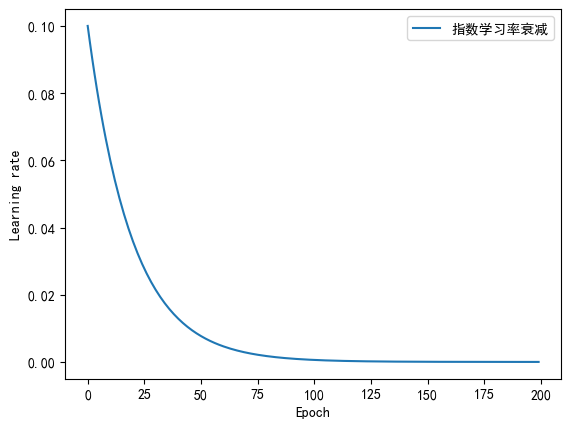

In [29]:
# 导入torch模块
import torch 
import torch.nn as nn

# 指定字体路径
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

def exponential_learning_rate_decay():
    
    # 设置学习率、迭代次数、最大训练批次、学习率下降策略
    LR, iteration, max_epoch, gamma = 0.1, 10, 200,0.95
    # 设置目标值、输入值、权重参数
    y_true, x, w = torch.tensor([0]), torch.tensor([1.0]), torch.tensor([1.0], requires_grad=True)
    # 设置优化器
    optimizer = optim.SGD([w], lr=LR, momentum=0.9)
    # 设置学习率下降策略
    '''
    参数说明：
    gamma：指数底数
    lr = lr * gamma^epoch
    '''
    scheduler_lr = optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
    # 设置学习率和当前批次集合
    lr_arr, epoch_arr = [], []
    for epoch in range(max_epoch):
        lr_arr.append(scheduler_lr.get_last_lr())
        epoch_arr.append(epoch)
        for i in range(iteration):
            # 获取损失值
            loss = (w*x -y_true) ** 2
            # 梯度清零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 更新权重参数
            optimizer.step()
        
        # 更新下一个epoch学习率
        scheduler_lr.step()
    
    # 绘制学习率变化曲线
    plt.plot(epoch_arr, lr_arr, label='指数学习率衰减')
    plt.xlabel('Epoch')
    plt.ylabel('Learning rate')
    plt.legend()
    plt.show()


exponential_learning_rate_decay() 

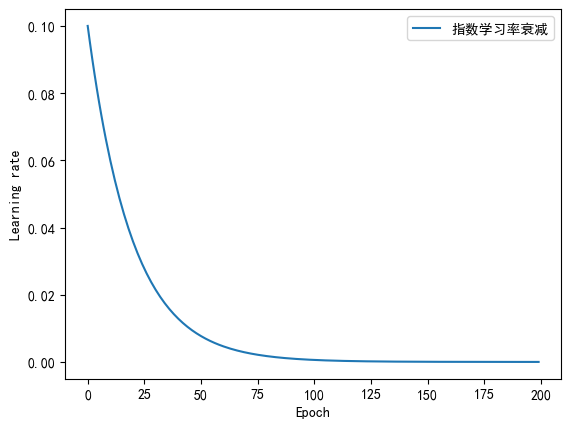

In [37]:
# 导入torch模块
import torch
import torch.nn as nn

# 指定字体路径
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

def learning_rate_decay():

    # 设置学习率、迭代次数、最大训练批次、学习率下降策略
    LR, iteration, max_epoch = 0.1, 10, 200
    # 设置目标值、输入值、权重参数
    y_true, x, w = torch.tensor([0]), torch.tensor([1.0]), torch.tensor([1.0], requires_grad=True)
    # 设置优化器
    optimizer = optim.SGD([w], lr=LR, momentum=0.9)
    # 设置学习率下降策略

    type = '指数学习率衰减'
    global scheduler_lr, label
    if '等间隔学习率衰减' == type:
        step_size, gamma, label = 50, 0.5, '等间隔学习率衰减'
        '''
        设置学习下降策略（等间隔学习率衰减方式）
        参数说明：
        step_size:调整间隔数
        gama：调整系数
        调整方式： lr = lr * gama
        '''
        scheduler_lr = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    elif '指定间隔学习率衰减' == type:
        # 设置调整时刻数
        gamma, milestones = 0.5, [50, 125, 160]
        label = '指定间隔学习率 \n 里程碑:{}'.format(milestones)
        '''
        参数说明：
        milestones：设置调整轮次
        gamma：设置调整系数
        调整方式：lr = lr * gamma
        '''
        scheduler_lr = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)
    elif '指数学习率衰减' == type:
        gamma, label = 0.95, '指数学习率衰减'
        '''
        参数说明：
        gamma：指数底数
        lr = lr * gamma^epoch
        '''
        scheduler_lr = optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)

    # 设置学习率和当前批次集合
    lr_arr, epoch_arr = [], []
    for epoch in range(max_epoch):
        lr_arr.append(scheduler_lr.get_last_lr())
        epoch_arr.append(epoch)
        for i in range(iteration):
            # 获取损失值
            loss = (w*x -y_true) ** 2
            # 梯度清零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 更新权重参数
            optimizer.step()

        # 更新下一个epoch学习率
        scheduler_lr.step()

    # 绘制学习率变化曲线
    plt.plot(epoch_arr, lr_arr, label='指数学习率衰减')
    plt.xlabel('Epoch')
    plt.ylabel('Learning rate')
    plt.legend()
    plt.show()


learning_rate_decay()

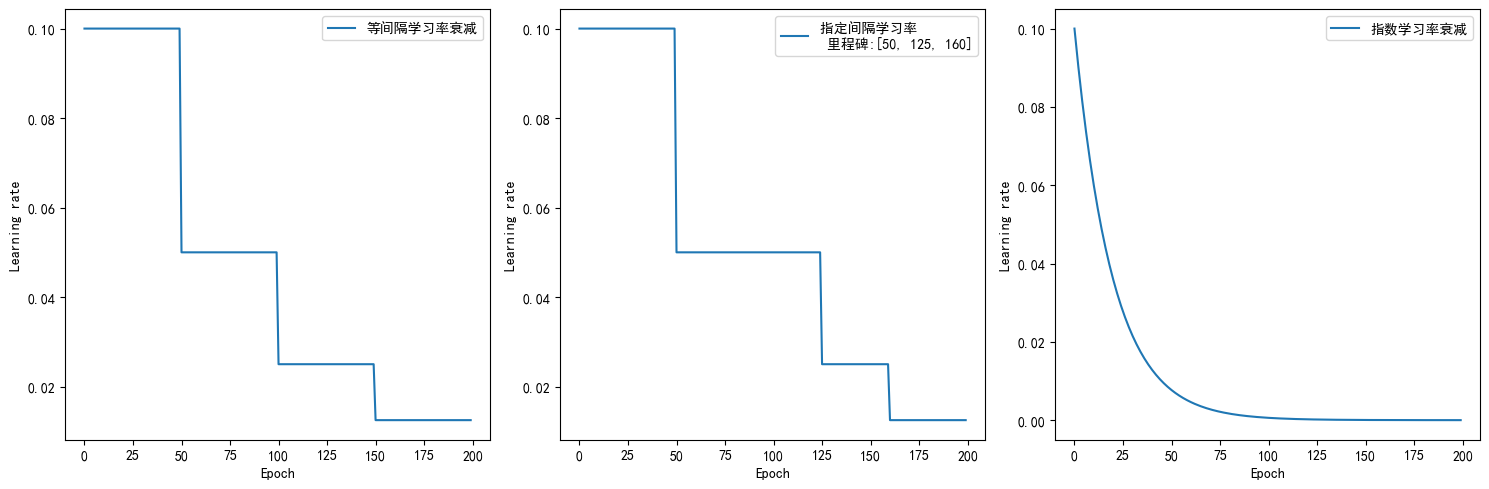

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 指定字体路径
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

def learning_rate_decay(type):
    # 设置学习率、迭代次数、最大训练批次、学习率下降策略
    LR, iteration, max_epoch = 0.1, 10, 200
    # 设置目标值、输入值、权重参数
    y_true, x, w = torch.tensor([0]), torch.tensor([1.0]), torch.tensor([1.0], requires_grad=True)
    # 设置优化器
    optimizer = optim.SGD([w], lr=LR, momentum=0.9)
    # 设置学习率下降策略

    global scheduler_lr, label
    if '等间隔学习率衰减' == type:
        step_size, gamma, label = 50, 0.5, '等间隔学习率衰减'
        '''
        设置学习下降策略（等间隔学习率衰减方式）
        参数说明：
        step_size:调整间隔数
        gamma：调整系数
        调整方式： lr = lr * gamma
        '''
        scheduler_lr = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    elif '指定间隔学习率衰减' == type:
        # 设置调整时刻数
        gamma, milestones = 0.5, [50, 125, 160]
        label = '指定间隔学习率 \n 里程碑:{}'.format(milestones)
        '''
        参数说明：
        milestones：设置调整轮次
        gamma：设置调整系数
        调整方式：lr = lr * gamma
        '''
        scheduler_lr = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)
    elif '指数学习率衰减' == type:
        gamma, label = 0.95, '指数学习率衰减'
        '''
        参数说明：
        gamma：指数底数
        lr = lr * gamma^epoch
        '''
        scheduler_lr = optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)

    # 设置学习率和当前批次集合
    lr_arr, epoch_arr = [], []
    for epoch in range(max_epoch):
        lr_arr.append(scheduler_lr.get_last_lr()[0])
        epoch_arr.append(epoch)
        for i in range(iteration):
            # 获取损失值
            loss = (w*x - y_true) ** 2
            # 梯度清零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 更新权重参数
            optimizer.step()

        # 更新下一个epoch学习率
        scheduler_lr.step()

    return epoch_arr, lr_arr, label

# 创建一个 1x3 的子图布局
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 定义三种学习率衰减策略
types = ['等间隔学习率衰减', '指定间隔学习率衰减', '指数学习率衰减']

# 绘制每种策略的学习率衰减曲线
for i, type in enumerate(types):
    epoch_arr, lr_arr, label = learning_rate_decay(type)
    axs[i].plot(epoch_arr, lr_arr, label=label)
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Learning rate')
    axs[i].legend()

# 调整子图之间的间距
plt.tight_layout()
plt.show()

In [43]:
import torch
import torch.nn as nn

def test():
    # 初始化随机失活层
    dropout = nn.Dropout(p=0.4)
    # 初始化输入数据:表示某一层的weight信息
    inputs = torch.randint(0, 10, size=[1, 4]).float()
    layer = nn.Linear(4,5)
    y = layer(inputs)
    y = torch.relu(y)
    print("未失活FC层的输出结果：\n", y)
    y =  dropout(y)
    print("失活后FC层的输出结果：\n", y)

test()

未失活FC层的输出结果：
 tensor([[1.8084, 0.5725, 0.0000, 3.6092, 0.0000]], grad_fn=<ReluBackward0>)
失活后FC层的输出结果：
 tensor([[3.0141, 0.0000, 0.0000, 6.0154, 0.0000]], grad_fn=<MulBackward0>)


In [48]:
import torch
import torch.nn as nn

def test_conv2d():
    # 创建一个眼根，图像是BN对每个通道特征图进行标准化
    input_2d = torch.randn(size=(1, 2, 4, 4))
    print(f'输出图像：{input_2d}')
    
    # 使用批量归一化
    bn2d = nn.BatchNorm2d(num_features=2, eps=1e-05, momentum=0.1, affine=True)
    output = bn2d(input_2d)
    print(f'输出:{output}, 尺寸：{output.size()}')
    
    # 打印bn2d纬度
    print(bn2d.weight)
    print(bn2d.bias)

test_conv2d()    

输出图像：tensor([[[[-1.5521e+00, -6.4898e-01, -7.7376e-02, -6.0421e-01],
          [-5.7315e-01,  9.5778e-01,  9.8202e-04, -1.3848e+00],
          [-1.8792e-01,  1.0325e+00, -2.4865e-01, -4.7209e-01],
          [ 1.3109e+00, -3.1671e-01, -1.8610e-01, -5.7646e-01]],

         [[-8.2625e-01, -2.2207e-01, -1.7949e+00,  7.2993e-01],
          [-5.6187e-01, -1.5793e-01,  1.5043e+00, -1.3950e+00],
          [ 5.9351e-01,  3.3138e-01, -1.0592e+00, -6.2800e-01],
          [-2.7134e-01,  1.8469e+00, -3.1250e-02, -9.3873e-02]]]])
输出:tensor([[[[-1.7601, -0.5664,  0.1890, -0.5073],
          [-0.4662,  1.5572,  0.2926, -1.5389],
          [ 0.0429,  1.6559, -0.0373, -0.3327],
          [ 2.0239, -0.1273,  0.0453, -0.4706]],

         [[-0.7407, -0.1005, -1.7671,  0.9083],
          [-0.4605, -0.0325,  1.7288, -1.3434],
          [ 0.7637,  0.4860, -0.9876, -0.5306],
          [-0.1527,  2.0918,  0.1017,  0.0354]]]],
       grad_fn=<NativeBatchNormBackward0>), 尺寸：torch.Size([1, 2, 4, 4])
Parameter cont

In [24]:
import pandas as pd 
 # 读取数据集
data = pd.read_csv('data/手机价格预测.csv')
# 创建一个字典，将英文表头映射到中文表头
header_mapping = {
    'battery_power': '电池一次可储存的总能量（毫安时）',
    'blue': '是否有蓝牙',
    'clock_speed': '微处理器执行指令的速度',
    'dual_sim': '是否支持双卡',
    'fc': '前置摄像头百万像素',
    'four_g': '是否有4G',
    'int_memory': '内存（GB）',
    'm_dep': '移动深度（cm）',
    'mobile_wt': '手机重量',
    'n_cores': '处理器内核数',
    'pc': '主摄像头百万像素',
    'px_height': '像素分辨率高度',
    'px_width': '像素分辨率宽度',
    'ram': '随机存取存储器（兆字节）',
    'sc_h': '手机屏幕高度（cm）',
    'sc_w': '手机屏幕宽度（cm）',
    'talk_time': '一次电池充电持续时间最长的时间',
    'three_g': '是否有3G',
    'touch_screen': '是否有触控屏',
    'wifi': '是否能连wifi',
    'price_range': '价格区间（0，1，2，3）'
}

# 重命名表头
data.rename(columns=header_mapping, inplace=True)
data

,电池一次可储存的总能量（毫安时）,是否有蓝牙,微处理器执行指令的速度,是否支持双卡,前置摄像头百万像素,是否有4G,内存（GB）,移动深度（cm）,手机重量,处理器内核数,...,像素分辨率高度,像素分辨率宽度,随机存取存储器（兆字节）,手机屏幕高度（cm）,手机屏幕宽度（cm）,一次电池充电持续时间最长的时间,是否有3G,是否有触控屏,是否能连wifi,价格区间（0，1，2，3）
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [95]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np


# !pip install scikit-learn
from sklearn.model_selection import train_test_split
# torch中工具类，将张量（torch.Tensor）封装成一个数据集
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchsummary import summary

def create_dataset(path='./data/手机价格预测.csv'):
    '''
    构造数据集方法
    :param path: 
    :return: 
    '''
    # 数据加载
    data = pd.read_csv(path)
    # 设置特征值和目标值
    x, y = data.iloc[:, :-1], data.iloc[:, -1]
    # 数据类型转化：特征值
    x = x.astype(np.float32)
    # 数据集划分
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=88)
    # 构建数据集，转换为pytoch类型
    train_dataset = TensorDataset(torch.from_numpy(x_train.values), torch.tensor(y_train.values))
    test_dataset = TensorDataset(torch.from_numpy(x_test.values), torch.tensor(y_test.values))
    
    # 返回数据集
    return train_dataset, test_dataset, x_train.shape[1], len(np.unique(y))


class PhonePriceModel(nn.Module):
    '''
    构建分类网络模型
    '''
    # 设置初始化函数
    def __init__(self, input_dim, output_dim):
        # 调用父类的初始化属性值，确保nn.Module的初始化代码能够正确执行
        super(PhonePriceModel, self).__init__()
        # 设置第一层网络：输入纬度：20 输出纬度：128
        self.linear_one = nn.Linear(input_dim, 128)
        # 设置第二层网络，输入纬度：128 输出纬度：256
        self.linear_two = nn.Linear(128, 256)
        # 设置第三层网络，输入纬度256 输出纬度：4
        self.linear_three = nn.Linear(256, output_dim)
        
    # 重写前向传播方法
    def forward(self, x):
        # 使用relu激活函数
        x = torch.relu(self.linear_one(x))
        x = torch.relu(self.linear_two(x))
        # 获取输出
        output = self.linear_three(x)
        return output
    
def module_train(train_dataset, input_dim, class_num):
    '''
    模型训练
    :param train_dataset: 
    :param input_dim: 
    :param class_num: 
    :return: 
    '''
    # 初始化随机数种子
    torch.manual_seed(0)
    # 初始化数据加载
    dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)
    # 初始化模型
    model = PhonePriceModel(input_dim, class_num)
    # 损失函数 CrossEntropyLoss = softmax + 损失函数 使用二分类交叉熵损失
    criterion = nn.CrossEntropyLoss()
    # 设置优化方法
    optimizer = optim.SGD(model.parameters(), lr=1e-3)
    # 定义训练轮次
    num_epoch = 50
    for epoch_index in range(num_epoch):
        # 获取训练开始时间
        start = time.time()
        # 设置总损失和总次数
        total_loss, total_num = 0.0, 0
        for x, y in dataloader:
            # 将数据送进网络中预测
            model.train()
            output = model(x)
            # 使用二分类交叉熵损失计算损失
            loss = criterion(output, y)
            # 梯度清零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 参数更新
            optimizer.step()
            # 损失累加
            total_num += 1
            total_loss += loss.item()
        # 打印损失变换结果
        print('epoch: %4s loss: %.2f, time: %.2fs' %(epoch_index + 1, total_loss / total_num, time.time() - start))
    torch.save(model.state_dict(), './model/phone-price-model.pth')



# 获取数据
train_dataset, valid_dataset, input_dim, class_num =  create_dataset('./data/手机价格预测.csv')
print("输入特征数：", input_dim)
print("分类个数：", class_num)
# 模型训练过程
module_train(train_dataset, input_dim, class_num)

输入特征数： 20
分类个数： 4
epoch:    1 loss: 13.11, time: 0.30s
epoch:    2 loss: 0.97, time: 0.27s
epoch:    3 loss: 0.92, time: 0.26s
epoch:    4 loss: 0.89, time: 0.21s
epoch:    5 loss: 0.87, time: 0.23s
epoch:    6 loss: 0.86, time: 0.24s
epoch:    7 loss: 0.85, time: 0.22s
epoch:    8 loss: 0.84, time: 0.22s
epoch:    9 loss: 0.84, time: 0.35s
epoch:   10 loss: 0.82, time: 0.53s
epoch:   11 loss: 0.82, time: 0.29s
epoch:   12 loss: 0.81, time: 0.22s
epoch:   13 loss: 0.80, time: 0.29s
epoch:   14 loss: 0.81, time: 0.25s
epoch:   15 loss: 0.79, time: 0.29s
epoch:   16 loss: 0.79, time: 0.23s
epoch:   17 loss: 0.80, time: 0.29s
epoch:   18 loss: 0.77, time: 0.25s
epoch:   19 loss: 0.77, time: 0.21s
epoch:   20 loss: 0.76, time: 0.26s
epoch:   21 loss: 0.77, time: 0.26s
epoch:   22 loss: 0.74, time: 0.38s
epoch:   23 loss: 0.75, time: 0.56s
epoch:   24 loss: 0.75, time: 0.27s
epoch:   25 loss: 0.76, time: 0.29s
epoch:   26 loss: 0.74, time: 0.25s
epoch:   27 loss: 0.74, time: 0.28s
epoch:   

In [96]:
import torch
import torch.nn as nn

def model_evaluation(valid_dataset, input_dim, class_num):
    '''
    模型评估
    :param valid_dataset: 
    :param input_dim: 
    :param class_num: 
    :return: 
    '''
    # 加载模型和训练好的网络参数
    model = PhonePriceModel(input_dim, class_num)
    model.load_state_dict(torch.load('./model/phone-price-model.pth'))
    # 构建加载器
    dataloader = DataLoader(valid_dataset, batch_size=8, shuffle=False)
    # 评估测试集
    correct = 0
    for x, y in dataloader:
        # 将其送入网络中
        model.eval() # 使用推理模式 
        output = model(x)
        # 获取类别结果
        # argmax: 最大值对应的下标, 即类别编码
        y_pred = torch.argmax(output, dim=1)
        # 获取预测正确的个数
        correct += (y_pred == y).sum()
    # 求预测精度
    print('Acc: %.5f' % (correct.item() / len(valid_dataset)))

# 获取数据
train_dataset, valid_dataset, input_dim, class_num = create_dataset('./data/手机价格预测.csv')
# 模型预测结果
model_evaluation(valid_dataset, input_dim, class_num)    

Acc: 0.66250


In [64]:
import torch
import time
import torch.nn as nn
import pandas as pd
import numpy as np
import torch.optim as optim

# 导入sklearn中数据集划分包
from sklearn.model_selection import train_test_split
# 导入数据集划分包
from sklearn.preprocessing import StandardScaler
# 导入张量工具类，让多个张量组成一个数据集
from torch.utils.data import TensorDataset
# 用于将数据集（如 TensorDataset）封装成一个可迭代的对象
from torch.utils.data import DataLoader

'''
优化方向：
- 对输入数据进行标准化
- 调整优化方法
- 调整学习率
- 增加批量归一化层
- 增加网络层数，神经元个数
- 增加训练轮次


'''

def create_dataset_optimize(path='./data/手机价格预测.csv'):
    # 读取数据集
    data = pd.read_csv(path)
    # 获取特征值和目标值
    x, y = data.iloc[:, :-1], data.iloc[:, -1]
    # 数据类型转换
    x, y = x.astype(np.float32), y.astype(np.int64)
    # 划分数据集
    x_train, x_test, y_train, y_test = train_test_split(x , y, train_size=0.8, random_state=88, stratify=y)
    # print(f'x_train数据标准化前：{x_train.head(1)}')
    # 设置 numpy 的打印选项，避免科学计数法
    # 将 DataFrame 转换为 ndarray
    '''
    优化：对数据集进行标准化
    '''
    transfer = StandardScaler()
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.transform(x_test)
    # 构建数据集
    train_dataset = TensorDataset(torch.from_numpy(x_train), torch.tensor(y_train.values))
    test_dataset = TensorDataset(torch.from_numpy(x_test), torch.tensor(y_test.values))
    # 返回数据集
    return train_dataset, test_dataset, x_train.shape[1], len(np.unique(y))

class PhonePriceModelOptimize(nn.Module):
    def __init__(self, input_dim, output_dim):
        '''
        网络结构参数初始化
        :param input_dim: 
        :param output_dim: 
        '''
        super(PhonePriceModelOptimize, self).__init__()
        '''
        优化：增加网络深度 （3 -> 5 层）
        '''
        self.linear_one = nn.Linear(input_dim, 128)
        self.linear_two = nn.Linear(128, 256)
        self.linear_three = nn.Linear(256, 512)
        self.linear_four = nn.Linear(512, 128)
        self.linear_five = nn.Linear(128, output_dim)
        
    def forward(self, x):
        '''
        设置网络前向传播
        :param x: 
        :return: 
        '''
        # 前向传播
        x = torch.relu(self.linear_one(x))
        x = torch.relu(self.linear_two(x))
        x = torch.relu(self.linear_three(x))
        x = torch.relu(self.linear_four(x))
        output = self.linear_five(x)
        # 获取数据结果
        return output

def model_training_optimize(train_dataset, input_dim, class_num):
    '''
    模型训练（优化）
    :param train_dataset: 
    :param input_dim: 
    :param class_num: 
    :return: 
    '''
    # 固定随机种子
    torch.manual_seed(0)
    # 初始化数据加载起
    data_loader = DataLoader(train_dataset, shuffle=True, batch_size=8)
    # 初始化模型
    model = PhonePriceModelOptimize(input_dim, class_num)
    # 损失函数（交叉熵损失函数）
    criterion = nn.CrossEntropyLoss()
    '''
    优化：使用Adam优化方法（SGD -> Adam）, 设置学习率1e-4（ 1e-3 -> 1e-4）
    '''
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    # 设置遍历轮次
    num_epoch = 50
    for epoch_index in range(num_epoch):
        # 设置训练总损失、次数、训练开始时间
        total_loss, total_num, start = 0.0, 0, time.time()
        # 遍历每个批次数据
        for x, y in data_loader:
            # 模型训练
            model.train()
            output = model(x)
            # 计算损失（使用交叉熵损失函数）
            loss = criterion(output, y)
            # 梯度清零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 参数更新
            optimizer.step()
            # 总的损失累加
            total_num += len(y)
            total_loss += loss.item() * len(y)
        # 打印损失变换结果
        print('epoch: %4s loss: %.2f, time: %.2fs' % (epoch_index + 1, total_loss / total_num, time.time() - start))    
    # 优化模型
    torch.save(model.state_dict(), './model/phone-price-model-optimize.pth')

def model_evaluation(test_dataset, input_dim, class_num):
    # 加载模型和训练好的网络参数
    model = PhonePriceModelOptimize(input_dim, class_num)
    # 加载模型文件
    model.load_state_dict(torch.load('./model/phone-price-model-optimize.pth'))
    # 构建加载器
    data_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
    # 评估测试集
    correct = 0
    for x, y in data_loader:
        # 将其送进网络
        output = model(x)
        # 获取预测结果
        y_predict = torch.argmax(output, dim=1)
        # 获取预测正确的个数
        correct += (y_predict == y).sum()

    # 求预测精度
    print('Acc: %.5f' % (correct / len(valid_dataset)))

# 1、获取数据
train_dataset, valid_dataset, input_dim, class_num =  create_dataset_optimize('./data/手机价格预测.csv')
print("输入特征数：", input_dim)
print("分类个数：", class_num)
# 2、模型训练
model_training_optimize(train_dataset, input_dim, class_num)
# 3、模型评估
model_evaluation(valid_dataset, input_dim, class_num)

输入特征数： 20
分类个数： 4
epoch:    1 loss: 1.23, time: 1.82s
epoch:    2 loss: 0.52, time: 2.59s
epoch:    3 loss: 0.29, time: 0.72s
epoch:    4 loss: 0.23, time: 0.70s
epoch:    5 loss: 0.19, time: 0.76s
epoch:    6 loss: 0.16, time: 0.97s
epoch:    7 loss: 0.14, time: 0.84s
epoch:    8 loss: 0.12, time: 0.76s
epoch:    9 loss: 0.10, time: 0.75s
epoch:   10 loss: 0.08, time: 3.55s
epoch:   11 loss: 0.08, time: 1.75s
epoch:   12 loss: 0.07, time: 1.49s
epoch:   13 loss: 0.06, time: 3.56s
epoch:   14 loss: 0.05, time: 2.64s
epoch:   15 loss: 0.04, time: 1.05s
epoch:   16 loss: 0.04, time: 1.03s
epoch:   17 loss: 0.03, time: 1.05s
epoch:   18 loss: 0.02, time: 0.73s
epoch:   19 loss: 0.02, time: 0.73s
epoch:   20 loss: 0.01, time: 0.78s
epoch:   21 loss: 0.02, time: 0.79s
epoch:   22 loss: 0.01, time: 0.74s
epoch:   23 loss: 0.01, time: 0.82s
epoch:   24 loss: 0.01, time: 0.75s
epoch:   25 loss: 0.01, time: 0.77s
epoch:   26 loss: 0.00, time: 0.77s
epoch:   27 loss: 0.00, time: 0.68s
epoch:   2

In [59]:
from numpy import ndarray
import numpy as np

    
def my_data_standard(data: ndarray) -> ndarray:
    '''
    数据标准化
    :param data: 
    :return: 
    '''
    print(data)
    # 将数据转换为二维数组（一个样本，多个特征）
    data = data.reshape(1, -1)
    # 计算每个特征的均值
    means = np.mean(data, axis=0)
    # 计算每个特征的标准差
    stds = np.std(data, axis=0)
    # 避免除以零的情况
    stds[stds == 0] = 1
    # 标准化数据
    data_scaled = (data - means) / stds

    print(data_scaled)
    return data_scaled
    
# 数据源
data = np.array([1658, 1, 1.4, 0, 0, 1, 39, 0.7, 182, 1, 5, 410, 522, 3483, 10, 1, 15, 1, 0, 1])
my_data_standard(data)

[1.658e+03 1.000e+00 1.400e+00 0.000e+00 0.000e+00 1.000e+00 3.900e+01
 7.000e-01 1.820e+02 1.000e+00 5.000e+00 4.100e+02 5.220e+02 3.483e+03
 1.000e+01 1.000e+00 1.500e+01 1.000e+00 0.000e+00 1.000e+00]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])